In [1]:
#importing libraries
import pandas as pd
import datetime

#reading in tweet csv files and converting to dfs
tweet_df = pd.read_csv("tweet.csv")
co_df = pd.read_csv("company.csv")
co_twt_df = pd.read_csv("company_tweet.csv")

#reading in stock csv and converting to dfs
go_df =pd.read_csv("GOOG.csv")
ap_df =pd.read_csv("AAPL.csv")
am_df =pd.read_csv("AMZN.csv")
ts_df =pd.read_csv("TSLA.csv")
ms_df =pd.read_csv("MSFT.csv")

In [2]:
#removing all the googl ticker rows
co_twt= co_twt_df[co_twt_df.ticker_symbol !="GOOGL"]


In [3]:
#checking to see if googl ticker is gone
co_twt.ticker_symbol.unique()


array(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'TSLA'], dtype=object)

In [4]:
#merging company tweet, and tweet dfs on "tweet_id"
merged_df = pd.merge(co_twt,tweet_df, on="tweet_id")
#merged_df.info

# exploring merged data, seperating each stock into its own df

In [5]:
merged_df.head()

tweet_id ticker_symbol       writer   post_date  \
0  550803612197457920          AAPL   SentiQuant  1420156789   
1  550803612197457920          AMZN   SentiQuant  1420156789   
2  550803610825928706          AAPL   SentiQuant  1420156788   
3  550803610825928706          AMZN   SentiQuant  1420156788   
4  550803225113157632          AAPL  MacHashNews  1420156696   

                                                body  comment_num  \
0  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
3  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4  Rumor Roundup: What to expect when you're expe...            0   

   retweet_num  like_num  
0            0         1  
1            0         1  
2            0         1  
3            0         1  
4            0         0

In [6]:
#converting unix epoch to date format similar
merged_df["post_date"] = pd.to_datetime(tweet_df["post_date"], unit='s').dt.strftime('%d-%m-%Y')
merged_df.tail()

tweet_id ticker_symbol          writer post_date  \
4008871  1212158772015034369          TSLA       StockJoke       NaN   
4008872  1212159099632267268          TSLA       sweetog76       NaN   
4008873  1212159184931717120          TSLA  MelaynaLokosky       NaN   
4008874  1212159838882533376          TSLA   ShortingIsFun       NaN   
4008875  1212160015332728833          TSLA     Commuternyc       NaN   

                                                      body  comment_num  \
4008871  I'm getting wasted on NYE, and thanks to @NHTS...            0   
4008872                       $TSLA Very Interesting dude:            0   
4008873  If only 2020 brought more self-awareness to Te...            0   
4008874  In 2020 I may start Tweeting out positive news...            0   
4008875  Patiently Waiting for the no twitter sitter tw...            0   

         retweet_num  like_num  
4008871            0         0  
4008872            0         0  
4008873            1         0  
4008874            0         1  
4008875            0         5

In [7]:
#exploring merged df for null values and noticed a few in postdate.
merged_df.sample(20)

tweet_id ticker_symbol           writer   post_date  \
1772205  1201967437022785537          AAPL    PortfolioBuzz  21-04-2017   
1394984  1045661178289106944          AAPL   danielnewmanUV  11-10-2016   
1459524  1070083417587507200          TSLA   parklandtrader  03-11-2016   
3474401  1022252646235860992          TSLA        Loominext  19-08-2019   
438752    686200855180136448          AAPL     tradewithjoe  23-07-2015   
3893153  1158152153669627904          TSLA   GerberKawasaki         NaN   
2623935  1057329964956168192          AMZN              NaN  13-08-2018   
2559483   992732157029310465          AMZN   kgazette_stock  23-07-2018   
2976005  1002183386050547713          MSFT         nanexllc  07-01-2019   
1277189   990269779473784833          AAPL            mchjc  30-08-2016   
1759556  1194312063969091584          AAPL      davidmoadel  12-04-2017   
1839589   613732288048685056          GOOG     Stockaholics  01-06-2017   
1502767  1085212290377543685          AAPL            UlmHi  25-11-2016   
3035008  1192914254204043264          MSFT  Jeffrey_Anthony  31-01-2019   
1463481  1071776563040006145          AAPL         TJReazor  05-11-2016   
1441975  1064041839441920000          AAPL         treabase  27-10-2016   
2913403   851915855885619200          MSFT          App_sw_  07-12-2018   
123859    582184224872140801          GOOG      StockOyster  03-03-2015   
270888    628325885624647680          AAPL      MacHashNews  06-05-2015   
86021     573154262609342464          AMZN    Bytesfrombits  12-02-2015   

                                                      body  comment_num  \
1772205  Having 10 different news tabs open for $AAPL $...            0   
1394984  Apple phone will be profitable? In other news,...            0   
1459524  @GuyAdami @CNBCFastMoney - No one believes but...            1   
3474401  $TSLABiggest Squeeze OF ALL TIME coming in.......            1   
438752   SPECIAL TWITTER RATE $25/MONTH http://tradewit...            0   
3893153  My investment soulmate. ⁦@CathieDWood⁩ #tesla ...           34   
2623935  I've taken 3 trades since the opening bell (al...            2   
2559483  Johnson & Johnson $JNJ Holder Heritage Wealth ...            0   
2976005  Microsoft stock setting new all time highs. Le...            1   
1277189  $AAPL TA thoughts:  http://siliconinvestor.com...            0   
1759556  Bank Of America: Stocks Are The Most Expensive...            0   
1839589  $GYST Closed Up Powerfully Yesterday! Watch It...            0   
1502767  Ashfield Capital Partners Has Trimmed Its Appl...            0   
3035008  Current longs with entry going into next week....            0   
1463481  In this day of as the #Tradewar turns... China...            0   
1441975  $AAPL #trademark 88194491 - TURI CREATE - Clas...            0   
2913403  #Microsoft Windows Vista is officially dead, h...            0   
123859   Learn stock technical analysis and charting. h...            0   
270888   Get ready to rumble in Real Boxing 2 coming la...            0   
86021    The Morning Dump - March 4th #search #wearable...            0   

         retweet_num  like_num  
1772205            0         0  
1394984            0         6  
1459524            0         0  
3474401            0         0  
438752             1         0  
3893153           20       181  
2623935            3        16  
2559483            0         0  
2976005            2        11  
1277189            0         1  
1759556            0         0  
1839589            0         0  
1502767            0         0  
3035008            0         3  
1463481            0         1  
1441975            0         0  
2913403            1         1  
123859             1         0  
270888             0         0  
86021              0         1

In [8]:
#checking values before dropping null values
merged_df.count()

tweet_id         4008876
ticker_symbol    4008876
writer           3955885
post_date        3717964
body             4008876
comment_num      4008876
retweet_num      4008876
like_num         4008876
dtype: int64

In [9]:
#dropping null values
merged_df = merged_df.dropna()

In [10]:
#checking values/count after dropping null values
merged_df.count()

tweet_id         3673064
ticker_symbol    3673064
writer           3673064
post_date        3673064
body             3673064
comment_num      3673064
retweet_num      3673064
like_num         3673064
dtype: int64

In [11]:
merged_df.sample(20)

tweet_id ticker_symbol           writer   post_date  \
1133993   927824102949351424          AAPL  TranscriptDaily  28-06-2016   
1119483   920361586178453504          AAPL     budapest1924  21-06-2016   
2442523   880777342712508416          AMZN        whotrades  24-05-2018   
1554909  1106270271831531524          AAPL     AnsonCarlyle  21-12-2016   
800977    781774173060333568          AAPL     KryptoKhagan  08-02-2016   
1585650  1118381340414676997          AAPL     daviladamian  09-01-2017   
3182581   752615587612811265          TSLA    BertelSchmitt  02-04-2019   
1063560   892830413995028481          AAPL  AmericanBanking  26-05-2016   
1986484   790614925731328000          GOOG    PortfolioBuzz  18-08-2017   
2386506   827423616186748928          AMZN       shoprecord  27-04-2018   
719433    765193240869908482          AAPL     _peripherals  26-12-2015   
3369586   973994686569426949          TSLA      DonutShorts  17-06-2019   
1866266   643735585975173120          GOOG        TweakTown  16-06-2017   
2096662  1026827202652856321          GOOG    meinincubator  27-10-2017   
79321     571370684519067648          AAPL     droidtrader8  11-02-2015   
1611803  1126926808312467456          AAPL      Ladyluck193  22-01-2017   
3565602  1043133624739143682          TSLA   zomgapocalypse  12-10-2019   
2414760   857708703579090944          AMZN     Cycle_System  08-05-2018   
501247    704380257936109568          AAPL   computer_hware  20-08-2015   
952207    834184541870886913          AAPL   charliebilello  14-04-2016   

                                                      body  comment_num  \
1133993  Cadence Bank NA Has $3.11 Million Holdings in ...            0   
1119483  Commented on https://seekingalpha.com/article/...            0   
2442523  Wal-Mart Aims to Hit Amazon Where It Hurts htt...            0   
1554909  Join @RobinhoodApp and we'll both get a stock ...            0   
800977   I don't want to alarm anyone, but Apple was ju...            0   
1585650  Join @RobinhoodApp and we'll both get a stock ...            0   
3182581  @elonmusk: $TSLA Autopilot Beta Will Be Comple...            0   
1063560  Apple's buy rating reiterated at Instinet. $17...            0   
1986484  Gain from movement in these buzzing assets $AM...            0   
2386506  an $amzn cashier touches a lot of money.Those ...            0   
719433   #Apple could be planning 10.5-inch iPad Pro fo...            0   
3369586  Stormy weather in Fremont $TSLAhttps://cnbc.co...            2   
1866266  .@StarCraft II pro @coL_qxc is 'a big advocate...            0   
2096662                $GOOG WeeklyMomo above 1238Keep an             1   
79321                $AAPL bot 130c for .28 stop at 129.50            0   
1611803  Join @RobinhoodApp and we'll both get a stock ...            0   
3565602  Help me out here. Does Biff represent Elon, an...            0   
2414760  $AMZN Cycle webinar analysis look for a renewe...            0   
501247   #Apple ( $AAPL) will ask Congress for a 'thoug...            0   
952207   Dow stocks hitting all-time highs today...$AAP...            0   

         retweet_num  like_num  
1133993            0         0  
1119483            0         0  
2442523            0         0  
1554909            0         1  
800977             0         0  
1585650            0         1  
3182581            0         1  
1063560            0         0  
1986484            0         0  
2386506            0         0  
719433             0         0  
3369586            6        14  
1866266            0         1  
2096662            0         2  
79321              0         0  
1611803            0         0  
3565602            0         1  
2414760            0         0  
501247             0         0  
952207            12         6

In [12]:
merged_df.dtypes

tweet_id          int64
ticker_symbol    object
writer           object
post_date        object
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object

In [13]:
merged_df.describe()

tweet_id   comment_num   retweet_num      like_num
count  3.673064e+06  3.673064e+06  3.673064e+06  3.673064e+06
mean   8.633711e+17  2.363708e-01  5.772622e-01  1.559727e+00
std    1.843315e+17  1.490722e+00  6.952183e+00  1.014828e+01
min    5.504415e+17  0.000000e+00  0.000000e+00  0.000000e+00
25%    7.102460e+17  0.000000e+00  0.000000e+00  0.000000e+00
50%    8.526335e+17  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.027916e+18  0.000000e+00  0.000000e+00  1.000000e+00
max    1.212160e+18  6.310000e+02  9.990000e+02  9.990000e+02

In [14]:
merged_df

tweet_id ticker_symbol         writer   post_date  \
0         550803612197457920          AAPL     SentiQuant  01-01-2015   
1         550803612197457920          AMZN     SentiQuant  01-01-2015   
2         550803610825928706          AAPL     SentiQuant  01-01-2015   
3         550803610825928706          AMZN     SentiQuant  01-01-2015   
4         550803225113157632          AAPL    MacHashNews  01-01-2015   
...                      ...           ...            ...         ...   
3717959  1100674460158492673          TSLA    ChrisMarsch  31-12-2019   
3717960  1100675821608599552          TSLA   Stefan_Hajek  31-12-2019   
3717961  1100677890805506048          TSLA       gebbyart  31-12-2019   
3717962  1100677959898316801          TSLA      MStradeur  31-12-2019   
3717963  1100678195664351232          TSLA  PortfolioBuzz  31-12-2019   

                                                      body  comment_num  \
0        #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1        #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2        #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
3        #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4        Rumor Roundup: What to expect when you're expe...            0   
...                                                    ...          ...   
3717959  "Sure, the car will sell well for this price a...            0   
3717960                         Buy or sell ? @Tesla $Tsla            2   
3717961  $TSLA can Musk go to court to challenge any fi...            3   
3717962  The ultimate FU to shorts would be if Elon got...            2   
3717963  Trends matter not only in fashion but also in ...            0   

         retweet_num  like_num  
0                  0         1  
1                  0         1  
2                  0         1  
3                  0         1  
4                  0         0  
...              ...       ...  
3717959            0         1  
3717960            1         2  
3717961            0         0  
3717962            0         0  
3717963            0         0  

[3673064 rows x 8 columns]

In [15]:
#creating a df to check low impact tweets, whether or not to include them.
check_low_values = merged_df[(merged_df['comment_num']==0) & (merged_df['retweet_num']==0) & (merged_df['like_num']==0)]

In [16]:
#roughly 2/3s of the data has zero across comments,like,retweets.
check_low_values

tweet_id ticker_symbol           writer   post_date  \
4         550803225113157632          AAPL      MacHashNews  01-01-2015   
6         550802855129382912          AAPL     2waystrading  01-01-2015   
7         550802745737768960          AAPL  TV_TradingIdeas  01-01-2015   
9         550797275786518528          AAPL   Chasing__Stars  01-01-2015   
10        550797272686923776          AAPL   Chasing__Stars  01-01-2015   
...                      ...           ...              ...         ...   
3717943  1100660930952728576          TSLA        teslacito  31-12-2019   
3717945  1100661716092739585          TSLA        gbassakos  31-12-2019   
3717954  1100672774413144064          TSLA       LukeMcDuke  31-12-2019   
3717956  1100673898125742082          TSLA    Seamus_Mullan  31-12-2019   
3717963  1100678195664351232          TSLA    PortfolioBuzz  31-12-2019   

                                                      body  comment_num  \
4        Rumor Roundup: What to expect when you're expe...            0   
6        $AAPL - Will $AAPL Give Second entry opportuni...            0   
7        Will $AAPL Give Second entry opportunity? $AAP...            0   
9        $HMCP Opinions Updated Thursday, January 1, 20...            0   
10       $OPXS Company Info Updated Thursday, January 1...            0   
...                                                    ...          ...   
3717943  Tomorrow brings a steamer! $tsla #ElonMusk #Te...            0   
3717945  Repeat. $TSLA is not a car. Stop referring to ...            0   
3717954                                    Some Tesla news            0   
3717956  If you’re holding bags on $tsla you’re a crap ...            0   
3717963  Trends matter not only in fashion but also in ...            0   

         retweet_num  like_num  
4                  0         0  
6                  0         0  
7                  0         0  
9                  0         0  
10                 0         0  
...              ...       ...  
3717943            0         0  
3717945            0         0  
3717954            0         0  
3717956            0         0  
3717963            0         0  

[2256508 rows x 8 columns]

In [17]:
# could possibly create a function to create each associated stock df
#def parse_df 

In [18]:
#variable for changing date/count columns
date_titles = ["Date","tweet_count"]

In [19]:
ap_tweet = merged_df[(merged_df['ticker_symbol']=="AAPL")]
ap_tweet

tweet_id ticker_symbol         writer   post_date  \
0         550803612197457920          AAPL     SentiQuant  01-01-2015   
2         550803610825928706          AAPL     SentiQuant  01-01-2015   
4         550803225113157632          AAPL    MacHashNews  01-01-2015   
5         550802957370159104          AAPL  WaltLightShed  01-01-2015   
6         550802855129382912          AAPL   2waystrading  01-01-2015   
...                      ...           ...            ...         ...   
1790559  1212159254884433921          AAPL  QuantWolfLine  02-05-2017   
1790560  1212159275637886976          AAPL     GMGRIFF_79  02-05-2017   
1790561  1212159765914079234          AAPL      TEEELAZER  02-05-2017   
1790562  1212160410692046849          AAPL    MoriaCrypto  02-05-2017   
1790564  1212160477159206912          AAPL       treabase  02-05-2017   

                                                      body  comment_num  \
0        #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2        #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4        Rumor Roundup: What to expect when you're expe...            0   
5        An $AAPL store line in Sapporo Japan for the "...            2   
6        $AAPL - Will $AAPL Give Second entry opportuni...            0   
...                                                    ...          ...   
1790559  Imagine calling your broker-dealer and wanting...            1   
1790560  $AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...            0   
1790561  That $SPY $SPX puuump in the last hour was the...            1   
1790562  I don't discriminate. I own both $aapl and $ms...            1   
1790564  $AAPL #patent 10,522,475 Vertical interconnect...            0   

         retweet_num  like_num  
0                  0         1  
2                  0         1  
4                  0         0  
5                  4         4  
6                  0         0  
...              ...       ...  
1790559            0         1  
1790560            0         1  
1790561            0         6  
1790562            0         1  
1790564            0         0  

[1414802 rows x 8 columns]

In [20]:
#creading df of tweets per day to merge with stock dfs
ap_count = pd.DataFrame(ap_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ap_count.columns=date_titles
ap_count

Date  tweet_count
0    13-06-2016         5262
1    21-03-2016         5186
2    21-07-2015         5185
3    27-04-2015         5106
4    27-01-2015         4983
..          ...          ...
848  26-02-2017          353
849  19-03-2017          338
850  29-05-2016          290
851  22-08-2015          240
852  11-10-2015          180

[853 rows x 2 columns]

In [21]:
am_tweet = merged_df[(merged_df["ticker_symbol"]=="AMZN")]
am_tweet

tweet_id ticker_symbol           writer   post_date  \
1         550803612197457920          AMZN       SentiQuant  01-01-2015   
3         550803610825928706          AMZN       SentiQuant  01-01-2015   
43        550780769497808896          AMZN     SharePlanner  01-01-2015   
56        550773410742403072          AMZN       SentiQuant  01-01-2015   
93        550743209971036161          AMZN       SentiQuant  01-01-2015   
...                      ...           ...              ...         ...   
2761790  1212153821515931650          AMZN  TopStockAlerts1  02-10-2018   
2761791  1212154334600818689          AMZN         thequ4nt  02-10-2018   
2761792  1212155226377117697          AMZN  DentonBlackwell  02-10-2018   
2761793  1212156775178416128          AMZN        ITRADEVOL  02-10-2018   
2761794  1212157343351238656          AMZN     naashonomics  02-10-2018   

                                                      body  comment_num  \
1        #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
3        #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
43       2014 Was A Great Year of Trading In The Splash...            1   
56       #TOPTICKERTWEETS $IMRS $AAPL $BABA $EBAY $AMZN...            0   
93       #TOPTICKERTWEETS $AAPL $BABA $EBAY $IMRS $AMZN...            0   
...                                                    ...          ...   
2761790  $AMZN Amazon Stock Broke Out -- and Hesitated;...            0   
2761791  [Yahoo Finance Video - December 31, 2019] $AMZ...            0   
2761792  @Ryzenn $AAPL has to have a lights out ER to k...            0   
2761793  Is there a public database or website where I ...            0   
2761794                  $FB $AMZN $GOOGL $NFLX #FANG 2019            0   

         retweet_num  like_num  
1                  0         1  
3                  0         1  
43                 0         1  
56                 0         0  
93                 0         1  
...              ...       ...  
2761790            0         0  
2761791            1         1  
2761792            0         1  
2761793            0         2  
2761794            0         0  

[709192 rows x 8 columns]

In [65]:
am_tweet.to_csv('am_tweet.csv', index=False)

In [22]:
#creading df of tweets per day to merge with stock dfs
am_count = pd.DataFrame(am_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
am_count.columns=date_titles
am_count

Date  tweet_count
0     07-08-2018         7082
1     01-08-2018         5595
2     08-08-2018         5087
3     02-08-2018         4959
4     28-09-2018         4778
...          ...          ...
1366  05-08-2017            5
1367  21-02-2015            3
1368  20-01-2015            3
1369  07-11-2015            2
1370  06-09-2015            1

[1371 rows x 2 columns]

In [66]:
go_tweet = merged_df[(merged_df["ticker_symbol"]=="GOOG")]
go_tweet

tweet_id ticker_symbol           writer   post_date  \
42        550780769497808896          GOOG     SharePlanner  01-01-2015   
60        550771969789267968          GOOG     GiveBack2011  01-01-2015   
123       550719478963929088          GOOG     Stockaholics  01-01-2015   
142       550703624544718848          GOOG  laurenholmesNYC  01-01-2015   
148       550699059280101377          GOOG   Theonemicshow1  01-01-2015   
...                      ...           ...              ...         ...   
2150391  1212145324296458241          GOOG   tradeoilstocks  29-11-2017   
2150392  1212145509579837440          GOOG        econalert  29-11-2017   
2150393  1212146656335949824          GOOG  SVPR_Sweetheart  29-11-2017   
2150394  1212154645981941760          GOOG  TopStockAlerts1  29-11-2017   
2150395  1212159132758728704          GOOG          wilwen2  29-11-2017   

                                                      body  comment_num  \
42       2014 Was A Great Year of Trading In The Splash...            1   
60       @BenedictEvans Great one. $GOOG at risk from $...            1   
123      Our Penny Stock Picks Gained Over 968% In the ...            0   
142      Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...            0   
148      Apple: Asian Carriers Are Making iPhone 6 Chea...            0   
...                                                    ...          ...   
2150391  $fb $amzn $goog $nflx? Should have an acronym ...            0   
2150392  $GOOG #patent 10,524,006 Automatic transition ...            0   
2150393  I'm banking on this and that Google will still...            0   
2150394  Bold Moves Google, Apple, Facebook and Other T...            0   
2150395  $goog closes at 1337.  Someone has a sense of ...            0   

         retweet_num  like_num  
42                 0         1  
60                 0         0  
123                0         0  
142                1         2  
148                0         1  
...              ...       ...  
2150391            0         0  
2150392            1         0  
2150393            0         1  
2150394            0         0  
2150395            0         1  

[384891 rows x 8 columns]

In [24]:
#test to merge stock data and tweet data, 
#go_tweet.rename({"post_date":"Date"}, axis=1)

In [25]:
#creading df of tweets per day to merge with stock dfs
go_count = pd.DataFrame(go_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
go_count.columns=date_titles
go_count

Date  tweet_count
0     16-06-2017         4940
1     02-08-2017         4215
2     01-08-2017         3570
3     27-07-2017         3020
4     06-07-2017         2907
...          ...          ...
1059  25-06-2016            6
1060  18-01-2016            3
1061  11-10-2015            3
1062  03-04-2016            1
1063  01-05-2016            1

[1064 rows x 2 columns]

In [26]:
ms_tweet = merged_df[(merged_df["ticker_symbol"]=="MSFT")]
ms_tweet

tweet_id ticker_symbol           writer   post_date  \
72        550756325253455872          MSFT   LongbetCapital  01-01-2015   
107       550731345614602240          MSFT      TalkMarkets  01-01-2015   
115       550726427164020737          MSFT      TalkMarkets  01-01-2015   
134       550706228888756224          MSFT  investcorrectly  01-01-2015   
137       550705849690116096          MSFT  SwingTradeAlert  01-01-2015   
...                      ...           ...              ...         ...   
3040362  1212131912585826305          MSFT       robintrack  03-02-2019   
3040363  1212145214736875520          MSFT   MarketCurrents  03-02-2019   
3040364  1212146425607413761          MSFT    SentimEntropy  03-02-2019   
3040366  1212149780471853057          MSFT  harveyrosenblum  03-02-2019   
3040367  1212154474422099970          MSFT    TheUnicornBay  03-02-2019   

                                                      body  comment_num  \
72       RT @theinformation: Apple products are getting...            0   
107      Gappy New Year! $SPY $DIA $IWM $INTC $MSFT $AA...            0   
115      3 #Technology #Stocks That Crushed #Apple In 2...            0   
134      Key Tech Highlights Of 2014 $AAPL $BBRY $BB $M...            0   
137      IBD:2015 technology forecasts: Wearable techno...            0   
...                                                    ...          ...   
3040362  Top increases in popularity for stocks held by...            0   
3040363  $AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...            0   
3040364  Notable activity on social media recently for$...            0   
3040366  If this continues then the market will be enti...            0   
3040367  Btw, Estimated #Earnings Per Share for $MSFT i...            0   

         retweet_num  like_num  
72                 0         2  
107                0         1  
115                0         2  
134                0         1  
137                0         3  
...              ...       ...  
3040362            0         2  
3040363            0         2  
3040364            0         0  
3040366            0         2  
3040367            0         0  

[373798 rows x 8 columns]

In [27]:
#creading df of tweets per day to merge with stock dfs
ms_count = pd.DataFrame(ms_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ms_count.columns=date_titles
ms_count

Date  tweet_count
0     03-01-2019         6564
1     30-01-2019         5606
2     26-10-2018         4947
3     25-10-2018         4888
4     24-10-2018         4868
...          ...          ...
1487  06-09-2015            3
1488  24-12-2017            3
1489  30-12-2017            3
1490  29-12-2017            3
1491  03-12-2017            2

[1492 rows x 2 columns]

In [28]:
ts_tweet = merged_df[(merged_df["ticker_symbol"]=="TSLA")]
ts_tweet

tweet_id ticker_symbol           writer   post_date  \
17        550793298357391360          TSLA       ScoutingGW  01-01-2015   
44        550780769497808896          TSLA     SharePlanner  01-01-2015   
143       550703624544718848          TSLA  laurenholmesNYC  01-01-2015   
191       550676585393569792          TSLA  laurenholmesNYC  01-01-2015   
201       550673738161610752          TSLA  laurenholmesNYC  01-01-2015   
...                      ...           ...              ...         ...   
3717959  1100674460158492673          TSLA      ChrisMarsch  31-12-2019   
3717960  1100675821608599552          TSLA     Stefan_Hajek  31-12-2019   
3717961  1100677890805506048          TSLA         gebbyart  31-12-2019   
3717962  1100677959898316801          TSLA        MStradeur  31-12-2019   
3717963  1100678195664351232          TSLA    PortfolioBuzz  31-12-2019   

                                                      body  comment_num  \
17       #bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV...            0   
44       2014 Was A Great Year of Trading In The Splash...            1   
143      Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...            0   
191      $AAPL $ARWR $TSLA $BABA Wish everyone happy ne...            0   
201      $AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...            0   
...                                                    ...          ...   
3717959  "Sure, the car will sell well for this price a...            0   
3717960                         Buy or sell ? @Tesla $Tsla            2   
3717961  $TSLA can Musk go to court to challenge any fi...            3   
3717962  The ultimate FU to shorts would be if Elon got...            2   
3717963  Trends matter not only in fashion but also in ...            0   

         retweet_num  like_num  
17                 0         3  
44                 0         1  
143                1         2  
191                1         1  
201                1         1  
...              ...       ...  
3717959            0         1  
3717960            1         2  
3717961            0         0  
3717962            0         0  
3717963            0         0  

[790381 rows x 8 columns]

In [29]:
#creading df of tweets per day to merge with stock dfs
ts_count = pd.DataFrame(ts_tweet.post_date.value_counts()).reset_index()
#setting the appropriate columns
ts_count.columns=date_titles
ts_count

Date  tweet_count
0     04-04-2019         5394
1     24-10-2019         5140
2     24-04-2019         4956
3     25-10-2019         4786
4     15-03-2019         4715
...          ...          ...
1813  27-10-2018            1
1814  04-11-2018            1
1815  13-08-2017            1
1816  06-09-2015            1
1817  25-11-2018            1

[1818 rows x 2 columns]

# checking the stock dataframes now

In [30]:
go_df.tail()

Date          Low         Open   Volume         High        Close  \
4248  06-07-2021  2568.179932  2588.989990  1067500  2597.689941  2595.419922   
4249  07-07-2021  2595.199951  2606.820068   834000  2612.798096  2601.550049   
4250  08-07-2021  2560.800049  2565.000000   989000  2600.649902  2583.540039   
4251  09-07-2021  2578.870117  2578.889893   755300  2596.989990  2591.489990   
4252  12-07-2021  2592.000000  2596.669922   736910  2615.399902  2611.280029   

      Adjusted Close  
4248     2595.419922  
4249     2601.550049  
4250     2583.540039  
4251     2591.489990  
4252     2611.280029

In [31]:
go_df.dtypes

Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
dtype: object

In [32]:
go_test = pd.merge(go_df, go_count, on='Date')
go_test

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   522.665039   527.561584  1447563   529.815369   523.373108   
1    05-01-2015   511.655243   521.827332  2059840   522.894409   512.463013   
2    06-01-2015   499.678131   513.589966  2899940   514.761719   500.585632   
3    07-01-2015   498.281952   505.611847  2065054   505.855164   499.727997   
4    08-01-2015   489.655640   496.626526  3353582   502.101471   501.303680   
..          ...          ...          ...      ...          ...          ...   
729  22-11-2017  1031.430054  1035.000000   746300  1039.706055  1035.959961   
730  24-11-2017  1035.000000  1035.869995   537000  1043.177979  1040.609985   
731  27-11-2017  1038.439941  1040.000000  1307900  1055.459961  1054.209961   
732  28-11-2017  1040.000000  1055.089966  1424400  1062.375000  1047.410034   
733  29-11-2017  1015.650024  1042.680054  2459400  1044.079956  1021.659973   

     Adjusted Close  tweet_count  
0        523.373108          134  
1        512.463013          245  
2        500.585632          222  
3        499.727997          157  
4        501.303680          279  
..              ...          ...  
729     1035.959961         1090  
730     1040.609985          994  
731     1054.209961         1327  
732     1047.410034         1362  
733     1021.659973          359  

[734 rows x 8 columns]

In [33]:
go_test["Ticker"] = "GOOG"
go_test['Percent Change'] = ((go_test["Close"]-go_test["Open"])/go_test["Open"])*100
go_test

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   522.665039   527.561584  1447563   529.815369   523.373108   
1    05-01-2015   511.655243   521.827332  2059840   522.894409   512.463013   
2    06-01-2015   499.678131   513.589966  2899940   514.761719   500.585632   
3    07-01-2015   498.281952   505.611847  2065054   505.855164   499.727997   
4    08-01-2015   489.655640   496.626526  3353582   502.101471   501.303680   
..          ...          ...          ...      ...          ...          ...   
729  22-11-2017  1031.430054  1035.000000   746300  1039.706055  1035.959961   
730  24-11-2017  1035.000000  1035.869995   537000  1043.177979  1040.609985   
731  27-11-2017  1038.439941  1040.000000  1307900  1055.459961  1054.209961   
732  28-11-2017  1040.000000  1055.089966  1424400  1062.375000  1047.410034   
733  29-11-2017  1015.650024  1042.680054  2459400  1044.079956  1021.659973   

     Adjusted Close  tweet_count Ticker  Percent Change  
0        523.373108          134   GOOG       -0.793931  
1        512.463013          245   GOOG       -1.794524  
2        500.585632          222   GOOG       -2.532046  
3        499.727997          157   GOOG       -1.163709  
4        501.303680          279   GOOG        0.941785  
..              ...          ...    ...             ...  
729     1035.959961         1090   GOOG        0.092750  
730     1040.609985          994   GOOG        0.457585  
731     1054.209961         1327   GOOG        1.366342  
732     1047.410034         1362   GOOG       -0.727894  
733     1021.659973          359   GOOG       -2.015966  

[734 rows x 10 columns]

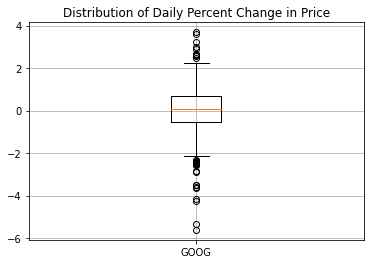

In [34]:
# Create Boxplot 

import matplotlib.pyplot as plt

x_labels =["GOOG"]
fig, ax = plt.subplots()
ax.boxplot(go_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [35]:
#noticed apple dates are not uniform
ap_df.tail(20)


Date         Low        Open     Volume        High       Close  \
10211  14-06-2021  127.070000  127.820000   96906500  130.539993  130.479996   
10212  15-06-2021  129.389999  129.940002   62746300  130.600006  129.639999   
10213  16-06-2021  128.460007  130.369995   91815000  130.889999  130.149994   
10214  17-06-2021  129.649994  129.800003   96721700  132.550003  131.789993   
10215  18-06-2021  130.240005  130.710007  108953300  131.509995  130.460007   
10216  21-06-2021  129.210007  130.300003   79663300  132.410004  132.300003   
10217  22-06-2021  131.619995  132.130005   74783600  134.080002  133.979996   
10218  23-06-2021  133.229996  133.770004   60214200  134.320007  133.699997   
10219  24-06-2021  132.929993  134.449997   68711000  134.639999  133.410004   
10220  25-06-2021  132.809998  133.460007   70783700  133.889999  133.110001   
10221  28-06-2021  133.350006  133.410004   62111300  135.250000  134.779999   
10222  29-06-2021  134.350006  134.800003   64556100  136.490005  136.330002   
10223  30-06-2021  135.869995  136.169998   63261400  137.410004  136.960007   
10224    1/7/2021  135.759995  136.600006   52485800  137.330002  137.270004   
10225    2/7/2021  137.750000  137.899994   78852600  140.000000  139.960007   
10226    6/7/2021  140.070007  140.070007  108181800  143.149994  142.020004   
10227    7/7/2021  142.660004  143.539993  104911600  144.889999  144.570007   
10228    8/7/2021  140.669998  141.580002  105575500  144.059998  143.240005   
10229    9/7/2021  142.649994  142.750000   99788400  145.649994  145.110001   
10230   12/7/2021  144.000000  146.210007   73241264  146.320007  144.500000   

       Adjusted Close  
10211      130.479996  
10212      129.639999  
10213      130.149994  
10214      131.789993  
10215      130.460007  
10216      132.300003  
10217      133.979996  
10218      133.699997  
10219      133.410004  
10220      133.110001  
10221      134.779999  
10222      136.330002  
10223      136.960007  
10224      137.270004  
10225      139.960007  
10226      142.020004  
10227      144.570007  
10228      143.240005  
10229      145.110001  
10230      144.500000

In [36]:
#making all dates uniform
ap_df["Date"] = pd.to_datetime(ap_df["Date"]).dt.strftime("%d-%m-%Y")


In [37]:
ap_df.tail(20)

Date         Low        Open     Volume        High       Close  \
10211  14-06-2021  127.070000  127.820000   96906500  130.539993  130.479996   
10212  15-06-2021  129.389999  129.940002   62746300  130.600006  129.639999   
10213  16-06-2021  128.460007  130.369995   91815000  130.889999  130.149994   
10214  17-06-2021  129.649994  129.800003   96721700  132.550003  131.789993   
10215  18-06-2021  130.240005  130.710007  108953300  131.509995  130.460007   
10216  21-06-2021  129.210007  130.300003   79663300  132.410004  132.300003   
10217  22-06-2021  131.619995  132.130005   74783600  134.080002  133.979996   
10218  23-06-2021  133.229996  133.770004   60214200  134.320007  133.699997   
10219  24-06-2021  132.929993  134.449997   68711000  134.639999  133.410004   
10220  25-06-2021  132.809998  133.460007   70783700  133.889999  133.110001   
10221  28-06-2021  133.350006  133.410004   62111300  135.250000  134.779999   
10222  29-06-2021  134.350006  134.800003   64556100  136.490005  136.330002   
10223  30-06-2021  135.869995  136.169998   63261400  137.410004  136.960007   
10224  07-01-2021  135.759995  136.600006   52485800  137.330002  137.270004   
10225  07-02-2021  137.750000  137.899994   78852600  140.000000  139.960007   
10226  07-06-2021  140.070007  140.070007  108181800  143.149994  142.020004   
10227  07-07-2021  142.660004  143.539993  104911600  144.889999  144.570007   
10228  07-08-2021  140.669998  141.580002  105575500  144.059998  143.240005   
10229  07-09-2021  142.649994  142.750000   99788400  145.649994  145.110001   
10230  07-12-2021  144.000000  146.210007   73241264  146.320007  144.500000   

       Adjusted Close  
10211      130.479996  
10212      129.639999  
10213      130.149994  
10214      131.789993  
10215      130.460007  
10216      132.300003  
10217      133.979996  
10218      133.699997  
10219      133.410004  
10220      133.110001  
10221      134.779999  
10222      136.330002  
10223      136.960007  
10224      137.270004  
10225      139.960007  
10226      142.020004  
10227      144.570007  
10228      143.240005  
10229      145.110001  
10230      144.500000

In [38]:
ap_df.dtypes
ap_test = pd.merge(ap_df, ap_count, on='Date')
ap_test

Date        Low       Open     Volume       High      Close  \
0    01-02-2015  26.837500  27.847500  212818400  27.860001  27.332500   
1    01-05-2015  26.352501  27.072500  257142000  27.162500  26.562500   
2    01-06-2015  26.157499  26.635000  263188400  26.857500  26.565001   
3    01-07-2015  26.674999  26.799999  160423600  27.049999  26.937500   
4    01-08-2015  27.174999  27.307501  237458000  28.037500  27.972500   
..          ...        ...        ...        ...        ...        ...   
579  11-01-2017  41.402500  42.467499  134551200  42.485001  41.722500   
580  11-02-2017  41.320000  41.650002  165573600  42.125000  42.027500   
581  11-03-2017  42.779999  43.500000  237594400  43.564999  43.125000   
582  12-01-2017  42.125000  42.487499  159037200  42.917500  42.762501   
583  12-04-2017  42.407501  43.119999  130169600  43.154999  42.450001   

     Adjusted Close  tweet_count  
0         24.819241          636  
1         24.120045         2717  
2         24.122320         2093  
3         24.460564         1813  
4         25.400398         1258  
..              ...          ...  
579       39.878925         1784  
580       40.170452          479  
581       41.219452          506  
582       41.019905         2105  
583       40.720139         1214  

[584 rows x 8 columns]

In [39]:
ap_test["Ticker"] = "AAPL"
ap_test['Percent Change'] = ((ap_test["Close"]-ap_test["Open"])/ap_test["Open"])*100
ap_test

Date        Low       Open     Volume       High      Close  \
0    01-02-2015  26.837500  27.847500  212818400  27.860001  27.332500   
1    01-05-2015  26.352501  27.072500  257142000  27.162500  26.562500   
2    01-06-2015  26.157499  26.635000  263188400  26.857500  26.565001   
3    01-07-2015  26.674999  26.799999  160423600  27.049999  26.937500   
4    01-08-2015  27.174999  27.307501  237458000  28.037500  27.972500   
..          ...        ...        ...        ...        ...        ...   
579  11-01-2017  41.402500  42.467499  134551200  42.485001  41.722500   
580  11-02-2017  41.320000  41.650002  165573600  42.125000  42.027500   
581  11-03-2017  42.779999  43.500000  237594400  43.564999  43.125000   
582  12-01-2017  42.125000  42.487499  159037200  42.917500  42.762501   
583  12-04-2017  42.407501  43.119999  130169600  43.154999  42.450001   

     Adjusted Close  tweet_count Ticker  Percent Change  
0         24.819241          636   AAPL       -1.849356  
1         24.120045         2717   AAPL       -1.883831  
2         24.122320         2093   AAPL       -0.262811  
3         24.460564         1813   AAPL        0.513063  
4         25.400398         1258   AAPL        2.435225  
..              ...          ...    ...             ...  
579       39.878925         1784   AAPL       -1.754280  
580       40.170452          479   AAPL        0.906359  
581       41.219452          506   AAPL       -0.862069  
582       41.019905         2105   AAPL        0.647253  
583       40.720139         1214   AAPL       -1.553799  

[584 rows x 10 columns]

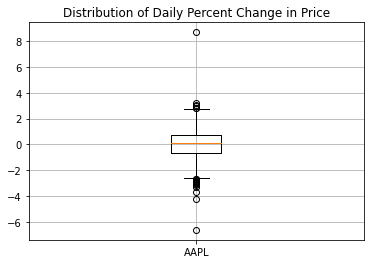

In [40]:
x_labels =["AAPL"]
fig, ax = plt.subplots()
ax.boxplot(ap_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [41]:
am_df.tail(20)

Date          Low         Open   Volume         High        Close  \
6059  14-06-2021  3335.500000  3346.830078  2569700  3385.000000  3383.870117   
6060  15-06-2021  3363.110107  3384.000000  2426200  3396.989990  3383.129883   
6061  16-06-2021  3360.530029  3392.000000  4202800  3426.350098  3415.250000   
6062  17-06-2021  3401.000000  3403.179932  5136500  3497.199951  3489.239990   
6063  18-06-2021  3473.709961  3479.989990  5247700  3507.000000  3486.899902   
6064  21-06-2021  3434.000000  3476.419922  3277100  3482.000000  3453.959961   
6065  22-06-2021  3456.090088  3458.060059  3345100  3523.780029  3505.439941   
6066  23-06-2021  3483.199951  3505.000000  2813300  3521.000000  3503.820068   
6067  24-06-2021  3430.850098  3507.639893  3832000  3524.860107  3449.080078   
6068  25-06-2021  3394.179932  3464.000000  3941000  3464.820068  3401.459961   
6069  28-06-2021  3413.510010  3416.000000  2242800  3448.000000  3443.889893   
6070  29-06-2021  3423.030029  3438.820068  2098400  3456.030029  3448.139893   
6071  30-06-2021  3435.000000  3441.060059  2404000  3471.600098  3440.159912   
6072  01-07-2021  3409.419922  3434.610107  2037100  3457.000000  3432.969971   
6073  02-07-2021  3436.919922  3451.639893  3169400  3511.719971  3510.979980   
6074  06-07-2021  3529.000000  3530.110107  6744800  3685.479980  3675.739990   
6075  07-07-2021  3678.909912  3717.379883  5328100  3734.199951  3696.580078   
6076  08-07-2021  3621.120117  3643.560059  5180600  3759.989990  3731.409912   
6077  09-07-2021  3693.399902  3722.520020  3745100  3748.000000  3719.340088   
6078  12-07-2021  3696.792969  3744.000000  2420142  3757.289795  3718.550049   

      Adjusted Close  
6059     3383.870117  
6060     3383.129883  
6061     3415.250000  
6062     3489.239990  
6063     3486.899902  
6064     3453.959961  
6065     3505.439941  
6066     3503.820068  
6067     3449.080078  
6068     3401.459961  
6069     3443.889893  
6070     3448.139893  
6071     3440.159912  
6072     3432.969971  
6073     3510.979980  
6074     3675.739990  
6075     3696.580078  
6076     3731.409912  
6077     3719.340088  
6078     3718.550049

In [42]:
am_df.dtypes
am_test = pd.merge(am_df, am_count, on='Date')
am_test

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   306.959991   312.579987  2783200   314.750000   308.519989   
1    05-01-2015   300.850006   307.010010  2774200   308.380005   302.190002   
2    06-01-2015   292.380005   302.239990  3519000   303.000000   295.290009   
3    07-01-2015   295.329987   297.500000  2640300   301.279999   298.420013   
4    08-01-2015   296.109985   300.320007  3088400   303.140015   300.459991   
..          ...          ...          ...      ...          ...          ...   
940  26-09-2018  1961.520020  1968.500000  4313500  1995.250000  1974.849976   
941  27-09-2018  1988.579956  1993.239990  4329400  2016.160034  2012.979980   
942  28-09-2018  1996.459961  2004.410034  4085100  2026.520020  2003.000000   
943  01-10-2018  2003.599976  2021.989990  3460500  2033.189941  2004.359985   
944  02-10-2018  1965.770020  1999.989990  5400700  2013.390015  1971.310059   

     Adjusted Close  tweet_count  
0        308.519989           32  
1        302.190002           35  
2        295.290009           43  
3        298.420013           31  
4        300.459991           73  
..              ...          ...  
940     1974.849976         1860  
941     2012.979980         3561  
942     2003.000000         4778  
943     2004.359985         3193  
944     1971.310059         2503  

[945 rows x 8 columns]

In [43]:
am_test["Ticker"] = "AMZN"
am_test['Percent Change'] = ((am_test["Close"]-am_test["Open"])/am_test["Open"])*100
am_test

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   306.959991   312.579987  2783200   314.750000   308.519989   
1    05-01-2015   300.850006   307.010010  2774200   308.380005   302.190002   
2    06-01-2015   292.380005   302.239990  3519000   303.000000   295.290009   
3    07-01-2015   295.329987   297.500000  2640300   301.279999   298.420013   
4    08-01-2015   296.109985   300.320007  3088400   303.140015   300.459991   
..          ...          ...          ...      ...          ...          ...   
940  26-09-2018  1961.520020  1968.500000  4313500  1995.250000  1974.849976   
941  27-09-2018  1988.579956  1993.239990  4329400  2016.160034  2012.979980   
942  28-09-2018  1996.459961  2004.410034  4085100  2026.520020  2003.000000   
943  01-10-2018  2003.599976  2021.989990  3460500  2033.189941  2004.359985   
944  02-10-2018  1965.770020  1999.989990  5400700  2013.390015  1971.310059   

     Adjusted Close  tweet_count Ticker  Percent Change  
0        308.519989           32   AMZN       -1.298867  
1        302.190002           35   AMZN       -1.569984  
2        295.290009           43   AMZN       -2.299491  
3        298.420013           31   AMZN        0.309248  
4        300.459991           73   AMZN        0.046612  
..              ...          ...    ...             ...  
940     1974.849976         1860   AMZN        0.322579  
941     2012.979980         3561   AMZN        0.990347  
942     2003.000000         4778   AMZN       -0.070347  
943     2004.359985         3193   AMZN       -0.871914  
944     1971.310059         2503   AMZN       -1.434004  

[945 rows x 10 columns]

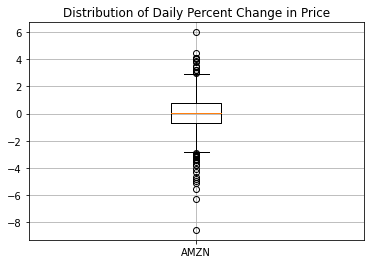

In [44]:
x_labels =["AMZN"]
fig, ax = plt.subplots()
ax.boxplot(am_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [45]:
ms_df.sample(20)

Date        Low       Open     Volume       High      Close  \
2178  21-10-1994   3.648438   3.703125   67099200   3.726562   3.710938   
8     25-03-1986   0.089410   0.090278   32083200   0.092014   0.092014   
940   29-11-1989   0.585069   0.607639   85894400   0.611111   0.593750   
4501  13-01-2004  27.260000  27.549999   51555900  27.639999  27.430000   
6190  28-09-2010  24.350000  24.799999   56041200  24.900000  24.680000   
7717  20-10-2016  56.660000  57.500000   49455600  57.520000  57.250000   
2372  31-07-1995   5.625000   5.820312  101435200   5.843750   5.656250   
2377  07-08-1995   5.734375   5.906250   64273600   5.968750   5.851562   
7588  19-04-2016  55.680000  56.630001   29596800  56.770000  56.389999   
6004  31-12-2009  30.480000  30.980000   31929700  30.990000  30.480000   
2514  21-02-1996   6.093750   6.109375   80046400   6.257812   6.242188   
2810  23-04-1997  13.796875  13.828125  102814400  14.468750  14.390625   
7088  24-04-2014  39.299999  39.740002   42381600  39.970001  39.860001   
1964  16-12-1993   2.492188   2.500000   29113600   2.531250   2.500000   
6836  24-04-2013  30.600000  30.620001   90946600  31.920000  31.760000   
4728  07-12-2004  27.000000  27.260000  111656000  27.379999  27.070000   
6449  06-10-2011  25.700001  25.900000   55111400  26.400000  26.340000   
1359  29-07-1991   1.432292   1.479167  136467200   1.484375   1.463542   
7578  05-04-2016  54.459999  55.189999   19272300  55.299999  54.560001   
3142  17-08-1998  25.750000  25.875000   54073200  26.843750  26.828125   

      Adjusted Close  
2178        2.351574  
8           0.058308  
940         0.376252  
4501       17.535767  
6190       19.412849  
7717       53.070747  
2372        3.584294  
2377        3.708061  
7588       51.588913  
6004       23.630186  
2514        3.955595  
2810        9.119156  
7088       34.564613  
1964        1.584218  
6836       26.752537  
4728       19.344711  
6449       21.239758  
1359        0.927428  
7578       49.914726  
3142       17.000647

In [46]:
ms_df.dtypes
ms_test = pd.merge(ms_df, ms_count, on='Date')
ms_test

Date         Low        Open    Volume        High       Close  \
0     02-01-2015   46.540001   46.660000  27913900   47.419998   46.759998   
1     05-01-2015   46.250000   46.369999  39673900   46.730000   46.330002   
2     06-01-2015   45.540001   46.380001  36447900   46.750000   45.650002   
3     07-01-2015   45.490002   45.980000  29114100   46.459999   46.230000   
4     08-01-2015   46.720001   46.750000  29645200   47.750000   47.590000   
...          ...         ...         ...       ...         ...         ...   
1023  28-01-2019  104.660004  106.260002  29476700  106.480003  105.080002   
1024  29-01-2019  102.169998  104.879997  31490500  104.970001  102.940002   
1025  30-01-2019  104.330002  104.620003  49471900  106.379997  106.379997   
1026  31-01-2019  103.180000  103.800003  55636400  105.220001  104.430000   
1027  01-02-2019  102.349998  103.779999  35535700  104.099998  102.779999   

      Adjusted Close  tweet_count  
0          41.348206           28  
1          40.967976           32  
2          40.366688           17  
3          40.879539           17  
4          42.082142           31  
...              ...          ...  
1023      101.992508         2429  
1024       99.915382         3504  
1025      103.254318         5606  
1026      101.361595         2036  
1027       99.760094         3232  

[1028 rows x 8 columns]

In [47]:
ms_test["Ticker"] = "MSFT"
ms_test['Percent Change'] = ((ms_test["Close"]-ms_test["Open"])/ms_test["Open"])*100
ms_test

Date         Low        Open    Volume        High       Close  \
0     02-01-2015   46.540001   46.660000  27913900   47.419998   46.759998   
1     05-01-2015   46.250000   46.369999  39673900   46.730000   46.330002   
2     06-01-2015   45.540001   46.380001  36447900   46.750000   45.650002   
3     07-01-2015   45.490002   45.980000  29114100   46.459999   46.230000   
4     08-01-2015   46.720001   46.750000  29645200   47.750000   47.590000   
...          ...         ...         ...       ...         ...         ...   
1023  28-01-2019  104.660004  106.260002  29476700  106.480003  105.080002   
1024  29-01-2019  102.169998  104.879997  31490500  104.970001  102.940002   
1025  30-01-2019  104.330002  104.620003  49471900  106.379997  106.379997   
1026  31-01-2019  103.180000  103.800003  55636400  105.220001  104.430000   
1027  01-02-2019  102.349998  103.779999  35535700  104.099998  102.779999   

      Adjusted Close  tweet_count Ticker  Percent Change  
0          41.348206           28   MSFT        0.214313  
1          40.967976           32   MSFT       -0.086256  
2          40.366688           17   MSFT       -1.573953  
3          40.879539           17   MSFT        0.543715  
4          42.082142           31   MSFT        1.796792  
...              ...          ...    ...             ...  
1023      101.992508         2429   MSFT       -1.110484  
1024       99.915382         3504   MSFT       -1.849728  
1025      103.254318         5606   MSFT        1.682273  
1026      101.361595         2036   MSFT        0.606934  
1027       99.760094         3232   MSFT       -0.963577  

[1028 rows x 10 columns]

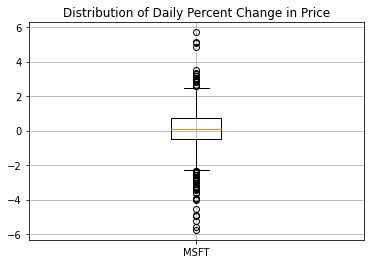

In [48]:
x_labels =["MSFT"]
fig, ax = plt.subplots()
ax.boxplot(ms_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

In [49]:
ts_df.sample(20)

Date         Low        Open     Volume        High       Close  \
699   10-04-2013    8.122000    8.140000   10605500    8.402000    8.372000   
318   30-09-2011    4.698000    4.960000    6680500    4.978000    4.878000   
1098  06-11-2014   45.700001   46.897999   76773500   49.338001   48.243999   
1985  17-05-2018   56.793999   57.180000   22103000   57.838001   56.908001   
230   26-05-2011    5.620000    5.764000   16684500    5.952000    5.896000   
621   14-12-2012    6.718000    6.756000    5115000    6.880000    6.762000   
468   07-05-2012    6.322000    6.392000    5790000    6.516000    6.494000   
891   13-01-2014   27.563999   29.156000   31580500   29.400000   27.868000   
1547  19-08-2016   44.506001   44.708000    8297500   45.034000   45.000000   
0     29-06-2010    3.508000    3.800000   93831500    5.000000    4.778000   
2352  31-10-2019   62.599998   62.619999   25335000   63.799999   62.984001   
1260  01-07-2015   53.570000   54.222000   10506000   54.523998   53.830002   
1792  10-08-2017   70.931999   72.320000   35464500   73.330002   71.080002   
1122  11-12-2014   41.646000   42.105999   33472000   43.085999   41.776001   
2476  30-04-2020  152.699997  171.037994   28471900  173.964005  156.376007   
2041  07-08-2018   67.830002   68.767998  154379000   77.491997   75.914001   
792   21-08-2013   29.250000   30.000000   31331500   30.062000   29.572001   
1224  11-05-2015   47.062000   47.257999   28361500   48.576000   47.897999   
2290  05-08-2019   45.155998   45.919998   35141500   46.273998   45.664001   
334   24-10-2011    5.550000    5.574000    4703000    5.778000    5.710000   

      Adjusted Close  
699         8.372000  
318         4.878000  
1098       48.243999  
1985       56.908001  
230         5.896000  
621         6.762000  
468         6.494000  
891        27.868000  
1547       45.000000  
0           4.778000  
2352       62.984001  
1260       53.830002  
1792       71.080002  
1122       41.776001  
2476      156.376007  
2041       75.914001  
792        29.572001  
1224       47.897999  
2290       45.664001  
334         5.710000

In [50]:
ts_df.dtypes
ts_test = pd.merge(ts_df, ts_count, on='Date')
ts_test

Date        Low       Open    Volume       High      Close  \
0     02-01-2015  42.652000  44.574001  23822000  44.650002  43.862000   
1     05-01-2015  41.431999  42.910000  26842500  43.299999  42.018002   
2     06-01-2015  40.841999  42.012001  31309500  42.840000  42.256001   
3     07-01-2015  41.956001  42.669998  14842000  42.956001  42.189999   
4     08-01-2015  42.001999  42.562000  17212500  42.759998  42.124001   
...          ...        ...        ...       ...        ...        ...   
1249  24-12-2019  82.538002  83.671997  40273500  85.094002  85.050003   
1250  26-12-2019  85.269997  85.582001  53169500  86.695999  86.188004   
1251  27-12-2019  85.222000  87.000000  49728500  87.061996  86.075996   
1252  30-12-2019  81.851997  85.758003  62932000  85.800003  82.940002   
1253  31-12-2019  80.416000  81.000000  51428500  84.258003  83.666000   

      Adjusted Close  tweet_count  
0          43.862000           28  
1          42.018002           56  
2          42.256001           56  
3          42.189999           27  
4          42.124001          103  
...              ...          ...  
1249       85.050003         1836  
1250       86.188004         3013  
1251       86.075996         2581  
1252       82.940002         2511  
1253       83.666000         2136  

[1254 rows x 8 columns]

In [51]:
ts_test["Ticker"] = "TSLA"
ts_test['Percent Change'] = ((ts_test["Close"]-ts_test["Open"])/ts_test["Open"])*100
ts_test

Date        Low       Open    Volume       High      Close  \
0     02-01-2015  42.652000  44.574001  23822000  44.650002  43.862000   
1     05-01-2015  41.431999  42.910000  26842500  43.299999  42.018002   
2     06-01-2015  40.841999  42.012001  31309500  42.840000  42.256001   
3     07-01-2015  41.956001  42.669998  14842000  42.956001  42.189999   
4     08-01-2015  42.001999  42.562000  17212500  42.759998  42.124001   
...          ...        ...        ...       ...        ...        ...   
1249  24-12-2019  82.538002  83.671997  40273500  85.094002  85.050003   
1250  26-12-2019  85.269997  85.582001  53169500  86.695999  86.188004   
1251  27-12-2019  85.222000  87.000000  49728500  87.061996  86.075996   
1252  30-12-2019  81.851997  85.758003  62932000  85.800003  82.940002   
1253  31-12-2019  80.416000  81.000000  51428500  84.258003  83.666000   

      Adjusted Close  tweet_count Ticker  Percent Change  
0          43.862000           28   TSLA       -1.597348  
1          42.018002           56   TSLA       -2.078766  
2          42.256001           56   TSLA        0.580785  
3          42.189999           27   TSLA       -1.124911  
4          42.124001          103   TSLA       -1.029086  
...              ...          ...    ...             ...  
1249       85.050003         1836   TSLA        1.646914  
1250       86.188004         3013   TSLA        0.708096  
1251       86.075996         2581   TSLA       -1.062073  
1252       82.940002         2511   TSLA       -3.285992  
1253       83.666000         2136   TSLA        3.291358  

[1254 rows x 10 columns]

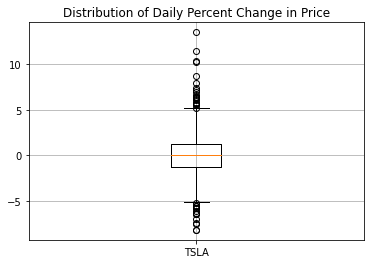

In [52]:
x_labels =["TSLA"]
fig, ax = plt.subplots()
ax.boxplot(ts_test["Percent Change"], labels=x_labels)
ax.set_title('Distribution of Daily Percent Change in Price')
ax.grid()
plt.show()

# saving transformed dataframes to csv

In [53]:
#google export to csv
go_test.to_csv('go_test.csv', index=False)



In [54]:
goog = pd.read_csv("go_test.csv")
goog

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   522.665039   527.561584  1447563   529.815369   523.373108   
1    05-01-2015   511.655243   521.827332  2059840   522.894409   512.463013   
2    06-01-2015   499.678131   513.589966  2899940   514.761719   500.585632   
3    07-01-2015   498.281952   505.611847  2065054   505.855164   499.727997   
4    08-01-2015   489.655640   496.626526  3353582   502.101471   501.303680   
..          ...          ...          ...      ...          ...          ...   
729  22-11-2017  1031.430054  1035.000000   746300  1039.706055  1035.959961   
730  24-11-2017  1035.000000  1035.869995   537000  1043.177979  1040.609985   
731  27-11-2017  1038.439941  1040.000000  1307900  1055.459961  1054.209961   
732  28-11-2017  1040.000000  1055.089966  1424400  1062.375000  1047.410034   
733  29-11-2017  1015.650024  1042.680054  2459400  1044.079956  1021.659973   

     Adjusted Close  tweet_count Ticker  Percent Change  
0        523.373108          134   GOOG       -0.793931  
1        512.463013          245   GOOG       -1.794524  
2        500.585632          222   GOOG       -2.532046  
3        499.727997          157   GOOG       -1.163709  
4        501.303680          279   GOOG        0.941785  
..              ...          ...    ...             ...  
729     1035.959961         1090   GOOG        0.092750  
730     1040.609985          994   GOOG        0.457585  
731     1054.209961         1327   GOOG        1.366342  
732     1047.410034         1362   GOOG       -0.727894  
733     1021.659973          359   GOOG       -2.015966  

[734 rows x 10 columns]

In [55]:
#apple export to csv

ap_test.to_csv('ap_test.csv', index=False)

In [56]:
appl = pd.read_csv("ap_test.csv")
appl

Date        Low       Open     Volume       High      Close  \
0    01-02-2015  26.837500  27.847500  212818400  27.860001  27.332500   
1    01-05-2015  26.352501  27.072500  257142000  27.162500  26.562500   
2    01-06-2015  26.157499  26.635000  263188400  26.857500  26.565001   
3    01-07-2015  26.674999  26.799999  160423600  27.049999  26.937500   
4    01-08-2015  27.174999  27.307501  237458000  28.037500  27.972500   
..          ...        ...        ...        ...        ...        ...   
579  11-01-2017  41.402500  42.467499  134551200  42.485001  41.722500   
580  11-02-2017  41.320000  41.650002  165573600  42.125000  42.027500   
581  11-03-2017  42.779999  43.500000  237594400  43.564999  43.125000   
582  12-01-2017  42.125000  42.487499  159037200  42.917500  42.762501   
583  12-04-2017  42.407501  43.119999  130169600  43.154999  42.450001   

     Adjusted Close  tweet_count Ticker  Percent Change  
0         24.819241          636   AAPL       -1.849356  
1         24.120045         2717   AAPL       -1.883831  
2         24.122320         2093   AAPL       -0.262811  
3         24.460564         1813   AAPL        0.513063  
4         25.400398         1258   AAPL        2.435225  
..              ...          ...    ...             ...  
579       39.878925         1784   AAPL       -1.754280  
580       40.170452          479   AAPL        0.906359  
581       41.219452          506   AAPL       -0.862069  
582       41.019905         2105   AAPL        0.647253  
583       40.720139         1214   AAPL       -1.553799  

[584 rows x 10 columns]

In [57]:
#tesla export to csv
ts_test.to_csv('ts_test.csv', index=False)


In [58]:
tsla = pd.read_csv("ts_test.csv")
tsla

Date        Low       Open    Volume       High      Close  \
0     02-01-2015  42.652000  44.574001  23822000  44.650002  43.862000   
1     05-01-2015  41.431999  42.910000  26842500  43.299999  42.018002   
2     06-01-2015  40.841999  42.012001  31309500  42.840000  42.256001   
3     07-01-2015  41.956001  42.669998  14842000  42.956001  42.189999   
4     08-01-2015  42.001999  42.562000  17212500  42.759998  42.124001   
...          ...        ...        ...       ...        ...        ...   
1249  24-12-2019  82.538002  83.671997  40273500  85.094002  85.050003   
1250  26-12-2019  85.269997  85.582001  53169500  86.695999  86.188004   
1251  27-12-2019  85.222000  87.000000  49728500  87.061996  86.075996   
1252  30-12-2019  81.851997  85.758003  62932000  85.800003  82.940002   
1253  31-12-2019  80.416000  81.000000  51428500  84.258003  83.666000   

      Adjusted Close  tweet_count Ticker  Percent Change  
0          43.862000           28   TSLA       -1.597348  
1          42.018002           56   TSLA       -2.078766  
2          42.256001           56   TSLA        0.580785  
3          42.189999           27   TSLA       -1.124911  
4          42.124001          103   TSLA       -1.029086  
...              ...          ...    ...             ...  
1249       85.050003         1836   TSLA        1.646914  
1250       86.188004         3013   TSLA        0.708096  
1251       86.075996         2581   TSLA       -1.062073  
1252       82.940002         2511   TSLA       -3.285992  
1253       83.666000         2136   TSLA        3.291358  

[1254 rows x 10 columns]

In [59]:
#microsoft export to csv
ms_test.to_csv('ms_test.csv', index=False)

In [60]:
msft = pd.read_csv("ms_test.csv")
msft

Date         Low        Open    Volume        High       Close  \
0     02-01-2015   46.540001   46.660000  27913900   47.419998   46.759998   
1     05-01-2015   46.250000   46.369999  39673900   46.730000   46.330002   
2     06-01-2015   45.540001   46.380001  36447900   46.750000   45.650002   
3     07-01-2015   45.490002   45.980000  29114100   46.459999   46.230000   
4     08-01-2015   46.720001   46.750000  29645200   47.750000   47.590000   
...          ...         ...         ...       ...         ...         ...   
1023  28-01-2019  104.660004  106.260002  29476700  106.480003  105.080002   
1024  29-01-2019  102.169998  104.879997  31490500  104.970001  102.940002   
1025  30-01-2019  104.330002  104.620003  49471900  106.379997  106.379997   
1026  31-01-2019  103.180000  103.800003  55636400  105.220001  104.430000   
1027  01-02-2019  102.349998  103.779999  35535700  104.099998  102.779999   

      Adjusted Close  tweet_count Ticker  Percent Change  
0          41.348206           28   MSFT        0.214313  
1          40.967976           32   MSFT       -0.086256  
2          40.366688           17   MSFT       -1.573953  
3          40.879539           17   MSFT        0.543715  
4          42.082142           31   MSFT        1.796792  
...              ...          ...    ...             ...  
1023      101.992508         2429   MSFT       -1.110484  
1024       99.915382         3504   MSFT       -1.849728  
1025      103.254318         5606   MSFT        1.682273  
1026      101.361595         2036   MSFT        0.606934  
1027       99.760094         3232   MSFT       -0.963577  

[1028 rows x 10 columns]

In [61]:
#amazon export to csv
am_test.to_csv('am_test.csv', index=False)

In [62]:
amzn = pd.read_csv("am_test.csv")
amzn

Date          Low         Open   Volume         High        Close  \
0    02-01-2015   306.959991   312.579987  2783200   314.750000   308.519989   
1    05-01-2015   300.850006   307.010010  2774200   308.380005   302.190002   
2    06-01-2015   292.380005   302.239990  3519000   303.000000   295.290009   
3    07-01-2015   295.329987   297.500000  2640300   301.279999   298.420013   
4    08-01-2015   296.109985   300.320007  3088400   303.140015   300.459991   
..          ...          ...          ...      ...          ...          ...   
940  26-09-2018  1961.520020  1968.500000  4313500  1995.250000  1974.849976   
941  27-09-2018  1988.579956  1993.239990  4329400  2016.160034  2012.979980   
942  28-09-2018  1996.459961  2004.410034  4085100  2026.520020  2003.000000   
943  01-10-2018  2003.599976  2021.989990  3460500  2033.189941  2004.359985   
944  02-10-2018  1965.770020  1999.989990  5400700  2013.390015  1971.310059   

     Adjusted Close  tweet_count Ticker  Percent Change  
0        308.519989           32   AMZN       -1.298867  
1        302.190002           35   AMZN       -1.569984  
2        295.290009           43   AMZN       -2.299491  
3        298.420013           31   AMZN        0.309248  
4        300.459991           73   AMZN        0.046612  
..              ...          ...    ...             ...  
940     1974.849976         1860   AMZN        0.322579  
941     2012.979980         3561   AMZN        0.990347  
942     2003.000000         4778   AMZN       -0.070347  
943     2004.359985         3193   AMZN       -0.871914  
944     1971.310059         2503   AMZN       -1.434004  

[945 rows x 10 columns]